## Exploratory Data Analysis

In [2]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt

# Code for hiding warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading dataset

df_path = "/content/drive/MyDrive/AI Projects/Feature Engineering/ICE 1/Assignemnt_data/"
df_path2 = df_path + 'dataset.csv'
df = pd.read_csv(df_path2)

In [4]:
df.head()

File_Name  \
0  The Tempe Police Department said it was invest...   
1  On Sunday, the inevitable happened: An autonom...   
2  Even before a driverless Uber vehicle struck a...   
3  On Sunday night, a woman died after she was hi...   
4  A self-driving vehicle made by Uber has struck...   

                                             Content        Category  
0  We continue to assist investigators in any way...  autonomous car  
1  Cars don’t see wellAutonomous cars don’t track...  autonomous car  
2  The accident in Tempe, Arizona, was believed t...  autonomous car  
3  On Sunday night, a woman died after she was hi...  autonomous car  
4  Something unexpectedly entering the vehicle’s ...  autonomous car

## Number of articles in each category

In [5]:
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("Category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
    color='Category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)

alt.LayerChart(...)

## % of articles in each category

In [6]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

alt.LayerChart(...)

## News length by category

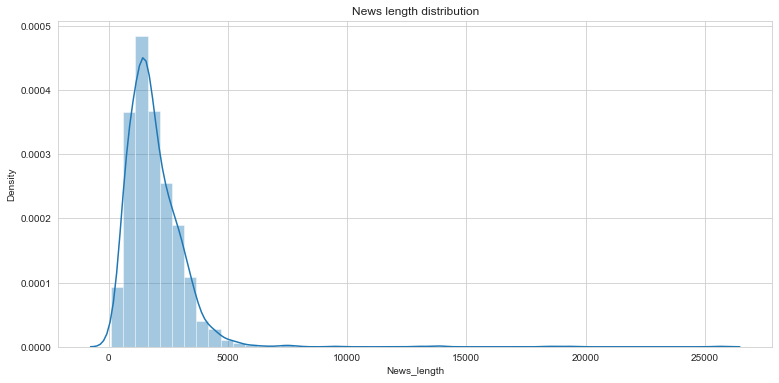

In [7]:
df['News_length'] = df['Content'].str.len()
plt.figure(figsize=(13,8))
sns.distplot(df['News_length']).set_title('News length distribution');

In [8]:
df['News_length'].describe()

count     2097.000000
mean      1926.348116
std       1329.671271
min        111.000000
25%       1178.000000
50%       1679.000000
75%       2460.000000
max      25596.000000
Name: News_length, dtype: float64

##### Let's remove from the 95% percentile onwards to better appreciate the histogram:

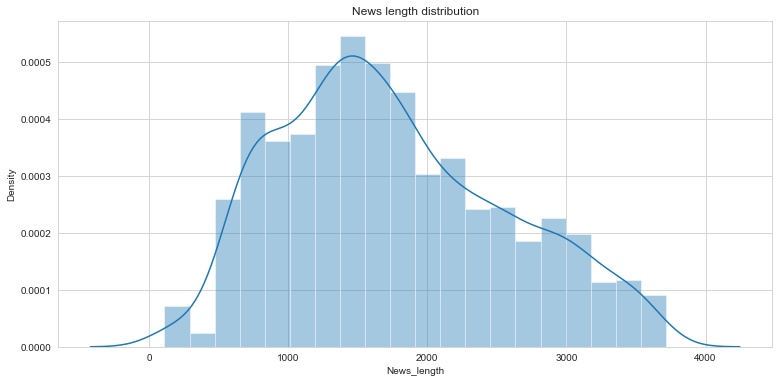

In [9]:
quant_95 = df['News_length'].quantile(0.95)
df95 = df[df['News_length'] < quant_95]
plt.figure(figsize=(13,8))
sns.distplot(df95['News_length']).set_title('News length distribution');

##### We can get the number of news articles with more than 10,000 characters: 

In [10]:
more10k = df[df['News_length'] > 10000]
len(more10k)

6

##### Let's see one:

In [11]:
more10k['Content'].iloc[0]

'Scissor Sisters triumph at Brits\r\n\r\nUS band Scissor Sisters led the winners at the UK music industry\'s Brit Awards, walking off with three prizes. The flamboyant act scored a hat-trick in the international categories, winning the best group, best album and best newcomer awards. Glasgow group Franz Ferdinand won two prizes, as did Keane and Joss Stone, who was voted best urban act by digital TV viewers. Robbie Williams\' Angels was named the best song of the past 25 years. Scissor Sisters frontwoman Ana Matronic collected the best international album prize from singer Siouxsie Sioux. She told the audience: "If you told us a year ago we would be getting these awards today we would have called you crazy. You guys made our dream come true."\r\n\r\nThe band - whose self-titled LP was 2004\'s biggest-selling album - thanked "all the members of the sisterhood", adding: "We wouldn\'t be here without you." The US band, who opened the show with Take Your Mama, won the best international ac

##### Let's now plot a boxplot:

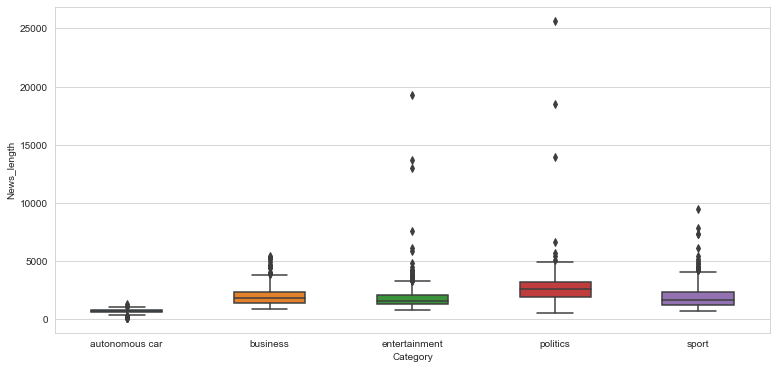

In [12]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df, x='Category', y='News_length', width=.8);

##### Now, let's remove the larger documents for better comprehension:

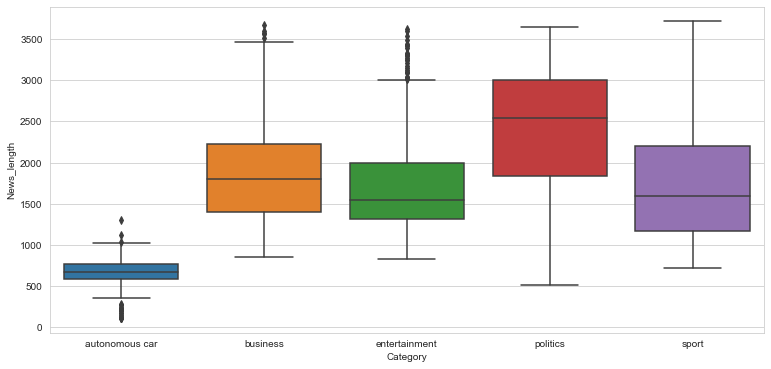

In [13]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df95, x='Category', y='News_length',width=.8););

##### We can see that, although the length distribution is different for every category, the difference is not too big. If we had way too different lengths between categories we would have a problem since the feature creation process may take into account counts of words. However, when creating the features with TF-IDF scoring, we will normalize the features just to avoid this.

##### At this point, we cannot do further Exploratory Data Analysis. We'll turn onto the Feature Engineering section.

##### We'll save the dataset:

In [14]:
with open('/content/drive/MyDrive/AI Projects/Feature Engineering/ICE 1/Assignemnt_data/News_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)